# Enron Dataset Analysis and Exploration

## Project Goals:

### 1. Model POI ( persons of interest ) 
### 2. Build a Linear Regression Model to Predict Bonuses from Monetary Variables

How define POI?

- Indicted
- Settled without admitting guilt
- Made deal and prosecuted

The dataset was obtained via the Carnegie Mellon page: https://www.cs.cmu.edu/~enron/

### Accuracy vs. Training Set Size

- What is the optimal amount to split data? Depends on sample size
- Curve is exponential, and plateaus
- Not know where is the right trade-off, but more data leads to better performance of model

### Review: Data Types

- Numeric: numerical values (numbers)

- Categorical: discrete values, limited number

- Time-series: date, timestamp

- Text: words

In [4]:
import pandas as pd
import numpy as np
import pickle

## 1. Loading and Viewing the Data

In [5]:
# data from pickle, gets into a dictionary format
enron_data = pickle.load(open("../final_project/final_project_dataset.pkl", "r"))

#getting it into a pandas df
enron_df = pd.DataFrame.from_dict(enron_data,orient='index')


In [6]:
enron_df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [7]:
enron_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       146 non-null object
to_messages                  146 non-null object
deferral_payments            146 non-null object
total_payments               146 non-null object
exercised_stock_options      146 non-null object
bonus                        146 non-null object
restricted_stock             146 non-null object
shared_receipt_with_poi      146 non-null object
restricted_stock_deferred    146 non-null object
total_stock_value            146 non-null object
expenses                     146 non-null object
loan_advances                146 non-null object
from_messages                146 non-null object
other                        146 non-null object
from_this_person_to_poi      146 non-null object
poi                          146 non-null bool
director_fees                146 non-null object
deferred_income              146 non-null object


### Dataset Info:

- 21 features
- 146 rows
- Null values are treated as 'NaN' in strings.

As NaNs are strings, how many are there for each column?

### Find the number and percentage of non-NaN values for each column


In [40]:
for col in enron_df.columns:
    if str(enron_df[col].dtype) != 'bool':
        print col,(enron_df[enron_df[col] !='NaN'][col].count()) \
        ,round((enron_df[enron_df[col] !='NaN'][col].count())/ \
        (float(enron_df.shape[0])),2)

salary 95 0.65
to_messages 86 0.59
deferral_payments 39 0.27
total_payments 125 0.86
exercised_stock_options 102 0.7
bonus 82 0.56
restricted_stock 110 0.75
shared_receipt_with_poi 86 0.59
restricted_stock_deferred 18 0.12
total_stock_value 126 0.86
expenses 95 0.65
loan_advances 4 0.03
from_messages 86 0.59
other 93 0.64
from_this_person_to_poi 86 0.59
director_fees 17 0.12
deferred_income 49 0.34
long_term_incentive 66 0.45
email_address 111 0.76
from_poi_to_this_person 86 0.59


In [17]:
print(enron_df[enron_df['salary']!="NaN"]['salary'].count())
print(enron_df[enron_df['email_address'] != 'NaN']['email_address'].count())
enron_df[]

95
111


# 1. Querying the Dataset

### How many people are there in this dataset?


In [8]:
len(enron_data.keys())

146

### How many features per person?


In [9]:
print("Number of features/person:",len(enron_data.values()[1]))


('Number of features/person:', 21)


### How many Persons of Interest are there in this dataset?

In [10]:
print("number of poi: ",enron_df[enron_df['poi']==True]['poi'].count())

('number of poi: ', 18)


### What is the total stock value of James Prentice?

In [11]:
print("Stock of Prentice, James:",enron_df[enron_df.index=='PRENTICE JAMES']['total_stock_value'])

('Stock of Prentice, James:', PRENTICE JAMES    1095040
Name: total_stock_value, dtype: object)


### How many emails did W. Colwell send to POI?

In [13]:
print(enron_df[enron_df.index == "COLWELL WESLEY"]['from_this_person_to_poi'])

COLWELL WESLEY    11
Name: from_this_person_to_poi, dtype: object


### What is the amount of exercised stock options for Jeffrey K Skilling?

In [14]:
print(enron_df[enron_df.index == "SKILLING JEFFREY K"]['exercised_stock_options'])

SKILLING JEFFREY K    19250000
Name: exercised_stock_options, dtype: object


### Who between Lay, Fastow, and Skilling took home the most money?

In [15]:
print(enron_df[enron_df.index == "SKILLING JEFFREY K"]['total_payments'])
print(enron_df[enron_df.index == "LAY KENNETH L"]['total_payments'])
print(enron_df[enron_df.index == "FASTOW ANDREW S"]['total_payments'])


SKILLING JEFFREY K    8682716
Name: total_payments, dtype: object
LAY KENNETH L    103559793
Name: total_payments, dtype: object
FASTOW ANDREW S    2424083
Name: total_payments, dtype: object


Kenneth lay took home the most money... by a wide margin.

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

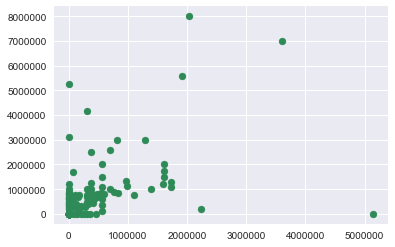

In [275]:
plt.scatter(x= enron_df['long_term_incentive'],y= enron_df['bonus'],c=['seagreen'])
#plt.xlim([0,1250000])
#plt.ylim([0,6000000])

In [274]:
enron_df = enron_df[enron_df['bonus'] < enron_df['bonus'].max()]

# 2. Linear Regression- using Salary & Long Term Incentive to predict Bonus

I will use a simple linear regression using the Salary and long term incentive variables to predict employee bonuses.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Cleaning feature columns 

In [ ]:
enron_df['salary'].replace('NaN',0,inplace=True)
enron_df['bonus'].replace('NaN',0,inplace=True)
enron_df['long_term_incentive'].replace('NaN',0,inplace=True)

#### Reshaping the data for train test split

In [276]:
features = enron_df[['salary','long_term_incentive']]
target = enron_df['bonus']
#features = features.values.reshape(146,2)
#target = target.values.reshape(146,1)

#### Splitting the Data

In [347]:
feature_train, feature_test, target_train, target_test = train_test_split(features,
                               target, 
                               test_size=0.5, 
                               random_state=42)


#### Importing and fitting the model

In [348]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(feature_test,target_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Getting predictions and model info

In [355]:
pred = reg.predict(feature_test)

print('slope: ',reg.coef_)
print('intercept',reg.intercept_)


('slope: ', array([ 1.64381626,  0.99108813]))
('intercept', 38920.685074062669)


### Model Evaluation

In [359]:
print('R^2 of test line:',reg.score(feature_test,target_test))
print('R^2 of train line:',reg.score(feature_train,target_train))

('R^2 of test line:', 0.3883249461374797)
('R^2 of train line:', 0.32634135478945703)


In [291]:
scores = pd.DataFrame(data=[reg.score(feature_train,target_train),
                                     reg.score(feature_test,target_test)],
                     columns=['score'])
scores['position'] = ['train','test']

Data is now in a format to analyze train and test performance.

In [292]:
scores

,score,position
0,0.326341,train
1,0.388325,test


(0, 1)

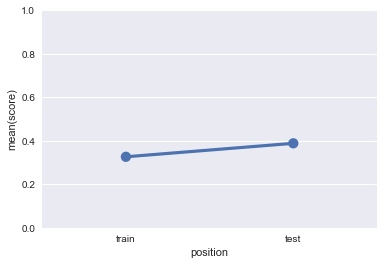

In [360]:
sns.pointplot(y=scores['score'],x=scores['position'])
plt.ylim([0,1])

The model did not do very well with the training set, but did better when testing, from 32.6% to 38.8%. While not a high-performance model, the robustness suggests there is some evidence that the variables included in this modeling have some predictive power on bonuses.

In [357]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(target_test,pred))

817387555505.0


There is a very large mean squared error in the model.

### Visualizing Model

#### 3-D (multi-linear)

In [325]:
print(X.shape,Y.shape, pred.shape)
#pred.reshape(72,72)

((72, 72), (72, 72), (72,))


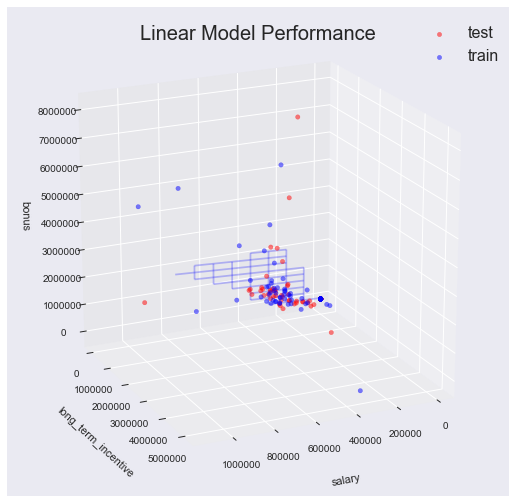

In [392]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

#plot feature train and test points
ax.scatter(feature_test['salary'],feature_test['long_term_incentive'],
           target_test,c='r', marker='o', alpha=0.5,label='test')

ax.scatter(feature_train['salary'],feature_train['long_term_incentive'],
           target_train,c='blue', marker='o', alpha=0.5,label = 'train')

# create legend
plt.legend(loc='upper left', numpoints=2, ncol=1, fontsize=16, bbox_to_anchor=(0.8, 0.99))
plt.title("Linear Model Performance",fontsize= 20)

#creating vars for grid
xi = np.linspace(feature_test['salary'].min(),
                 feature_test['salary'].max()
                 ,10)
yi = np.linspace(feature_test['long_term_incentive'].min(),
                 feature_test['long_term_incentive'].max()
                 ,10)
Z = griddata((feature_test['salary'],feature_test['long_term_incentive']),
             pred, (xi[None,:], yi[:,None]), method = 'cubic')



X, Y = np.meshgrid(feature_train['salary'], 
                   feature_train['long_term_incentive'])

ax.plot_wireframe(X= xi,
                Y = yi,
                Z = Z,
                  color='blue', 
                  alpha=0.25)

#toggles view on plot
ax.view_init(azim=65,elev=20)

#tidying labels and format
ax.set_xlabel('salary',labelpad=20)
ax.set_ylabel('long_term_incentive',labelpad=20)
ax.set_zlabel('bonus',labelpad=20)
#ax.set_xlim([0,1000000])
#ax.set_ylim([0,6000000])
#ax.set_zlim([0,6000000])


By visualizing the model we can see that the model misses a notable amount of true bonus values, values that could be considered outliers. However, it does net the majority of points inside it's net. Overall, we see decent performance. 

#### 2-D (single variable)

In [358]:
#plt.scatter(feature_test,target_test,c='r')
#plt.scatter(feature_train,target_train,c='b')
#plt.xlim([0,1250000])
#plt.ylim([0,6000000])
#plt.plot(feature_train, reg.predict(feature_train), color="b")


## Model: Conclusion

While the model had low R^2 values, they were robust. The results suggest that further exploration and addition of the other features in the dataset to model will result in a higher-performance. The low, albiet robust performance of the simple multi-variable linear regression indicates that this might not be algorithm best suitable for modeling this problem, but does provide an indication that this dataset can be modeled with this goal in mind.